In [1]:
#Declaring all libraries needed
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as stats
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import statsmodels.stats.api as sms
from scipy import stats as st
import pandas.tseries
#To scale our features as with linear regression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import matplotlib.ticker as mtick
from sklearn.metrics import confusion_matrix


In [2]:
import graphlab as gl

In [3]:
#read the data from u.data file stored in local
df = pd.read_table('u.data',header=0)
#assign column headers to the dataframe
df.columns = ["user_id", "item_id", "rating", "timestamp"]
#print top 10 of the data
print(df.head(10))

   user_id  item_id  rating  timestamp
0      186      302       3  891717742
1       22      377       1  878887116
2      244       51       2  880606923
3      166      346       1  886397596
4      298      474       4  884182806
5      115      265       2  881171488
6      253      465       5  891628467
7      305      451       3  886324817
8        6       86       3  883603013
9       62      257       2  879372434


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
user_id      99999 non-null int64
item_id      99999 non-null int64
rating       99999 non-null int64
timestamp    99999 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
#drop timestamp column as we don't need them
df = df.drop('timestamp', 1)
#print top 10 records
print(df.head(10))

   user_id  item_id  rating
0      186      302       3
1       22      377       1
2      244       51       2
3      166      346       1
4      298      474       4
5      115      265       2
6      253      465       5
7      305      451       3
8        6       86       3
9       62      257       2


In [6]:
str(df)

'       user_id  item_id  rating\n0          186      302       3\n1           22      377       1\n2          244       51       2\n3          166      346       1\n4          298      474       4\n5          115      265       2\n6          253      465       5\n7          305      451       3\n8            6       86       3\n9           62      257       2\n10         286     1014       5\n11         200      222       5\n12         210       40       3\n13         224       29       3\n14         303      785       3\n15         122      387       5\n16         194      274       2\n17         291     1042       4\n18         234     1184       2\n19         119      392       4\n20         167      486       4\n21         299      144       4\n22         291      118       2\n23         308        1       4\n24          95      546       2\n25          38       95       5\n26         102      768       2\n27          63      277       4\n28         160      234       5\n29       

In [7]:
#print the summary of the data
df.describe()

,user_id,item_id,rating
count,99999.000000,99999.000000,99999.000000
mean,462.487415,425.531965,3.529865
std,266.614421,330.799501,1.125678
min,1.000000,1.000000,1.000000
25%,254.000000,175.000000,3.000000
50%,447.000000,322.000000,4.000000
75%,682.000000,631.000000,4.000000
max,943.000000,1682.000000,5.000000


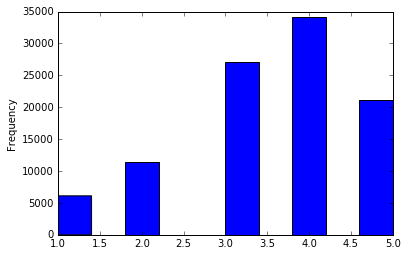

In [8]:
#plot the histogram for the movie ratings from the data file
df.rating.plot('hist')
plt.show()

## Showing the most popular movie in the dataset

In [9]:
movies_grouped = df.groupby(['item_id']).agg({'rating': 'count'}).reset_index()
grouped_sum = movies_grouped['rating'].sum()
movies_grouped['percentage']  = movies_grouped['rating'].div(grouped_sum)*100
movies_grouped.sort_values(['rating', 'item_id'], ascending = [0,1])

,item_id,rating,percentage
49,50,583,0.583006
257,258,509,0.509005
99,100,508,0.508005
180,181,507,0.507005
293,294,485,0.485005
285,286,481,0.481005
287,288,478,0.478005
0,1,452,0.452005
299,300,431,0.431004
120,121,429,0.429004


## Count number of unique users in the dataset

In [10]:
users = df['user_id'].unique()
len(users)

943

## Count the number of unique movies in the data

In [11]:
###Fill in the code here
movies = df['item_id'].unique()
len(movies)

1682

## Create a movie recommender

In [12]:
train_data, test_data = train_test_split(df, test_size = 0.20, random_state=0)
print(train_data.head(5))

       user_id  item_id  rating
10382      181     1068       1
73170      215      172       4
30938      126      690       3
99309      916      156       5
58959      648       15       1


## Simple popularity-based recommender class (Can be used as a black box)

In [13]:
#Recommenders.popularity_recommender_py

### Create an instance of popularity based recommender class

In [14]:
import Recommenders as Recommenders
import Evaluation as Evaluation
pm = Recommenders.popularity_recommender_py()
pm.create(train_data, 'user_id', 'item_id')

### Use the popularity model to make some predictions

In [15]:
user_id = users[5]
pm.recommend(user_id)

,user_id,item_id,score,Rank
49,115,50,457,1.0
257,115,258,411,2.0
99,115,100,410,3.0
180,115,181,407,4.0
287,115,288,379,5.0
293,115,294,379,6.0
0,115,1,371,7.0
285,115,286,364,8.0
299,115,300,345,9.0
120,115,121,337,10.0


### Use the popularity based model to make predictions for the following user id (Note the difference in recommendations from the first user id)

In [16]:
###Fill in the code here
user_id = users[8]
pm.recommend(user_id)

,user_id,item_id,score,Rank
49,6,50,457,1.0
257,6,258,411,2.0
99,6,100,410,3.0
180,6,181,407,4.0
287,6,288,379,5.0
293,6,294,379,6.0
0,6,1,371,7.0
285,6,286,364,8.0
299,6,300,345,9.0
120,6,121,337,10.0


### Build a movie recommender with personalization

We now create an item similarity based collaborative filtering model that allows us to make personalized recommendations to each user.

### Class for an item similarity based personalized recommender system (Can be used as a black box)

In [17]:
#Recommenders.item_similarity_recommender_py

### Create an instance of item similarity based recommender class¶


In [18]:
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'user_id', 'item_id')

### Use the personalized model to make some movie recommendations

In [19]:
#Print the movies for the user in training data
user_id = users[5]
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data movies for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend movies for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data movies for the user userid: 115:
------------------------------------------------------------------------------------
475
317
922
543
1073
33
741
218
187
50
237
284
470
696
269
177
479
77
12
185
847
9
282
265
980
530
11
234
684
1008
127
511
98
273
508
79
431
642
176
89
471
172
443
183
32
178
302
1067
20
657
357
92
23
596
673
558
96
654
48
121
628
4
279
7
466
124
462
8
22
644
174
229
93
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique movies for the user: 73
no. of unique movies in the training set: 1639
Non zero values in cooccurence_matrix :104254


,user_id,song,score,rank
0,115.0,204.0,0.222577,1.0
1,115.0,195.0,0.220373,2.0
2,115.0,56.0,0.216135,3.0
3,115.0,69.0,0.213849,4.0
4,115.0,385.0,0.208764,5.0
5,115.0,168.0,0.206471,6.0
6,115.0,182.0,0.205822,7.0
7,115.0,238.0,0.205167,8.0
8,115.0,186.0,0.204495,9.0
9,115.0,423.0,0.204465,10.0


### Use the personalized model to make recommendations for the following user id. (Note the difference in recommendations from the first user id.)

In [20]:
user_id = users[7]
#Fill in the code here
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data movies for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data movies for the user userid: 305:
------------------------------------------------------------------------------------
81
160
471
33
207
408
64
7
1015
403
239
275
175
475
318
129
60
856
48
960
238
228
1
69
663
222
50
1513
203
196
748
198
1512
184
1456
76
865
71
272
770
191
13
91
154
117
1073
511
289
1104
597
628
98
237
199
792
14
735
650
131
86
315
61
52
423
311
425
298
282
708
961
845
947
287
200
971
163
153
941
357
550
170
192
479
1018
195
204
209
679
70
168
66
482
963
257
709
2
923
210
486
474
654
1074
127
56
179
180
469
729
904
178
165
1411
242
505
462
174
427
749
300
305
943
793
79
451
327
135
144
97
478
690
96
806
12
83
285
480
87
173
385
16
88
751
428
186
713
89
483
655
484
431
143
246
214
530
176
778
249
1485
59
631
188
121
151
382
202
251
190
45
189
172
1286
169
638
15
464
223
527
921
201
529
433
664
----------------------------------------------------------------------
Recommenda

,user_id,song,score,rank
0,305.0,216.0,0.193552,1.0
1,305.0,132.0,0.189030,2.0
2,305.0,234.0,0.188345,3.0
3,305.0,82.0,0.188086,4.0
4,305.0,22.0,0.187946,5.0
5,305.0,183.0,0.183360,6.0
6,305.0,28.0,0.182252,7.0
7,305.0,4.0,0.181557,8.0
8,305.0,197.0,0.181312,9.0
9,305.0,182.0,0.178713,10.0


### We can also apply the model to find similar movies to any movie in the dataset

In [21]:
is_model.get_similar_items([216])

no. of unique movies in the training set: 1639
Non zero values in cooccurence_matrix :1502


,user_id,song,score,rank
0,,202.0,0.437107,1.0
1,,423.0,0.424779,2.0
2,,88.0,0.416382,3.0
3,,69.0,0.410920,4.0
4,,204.0,0.404313,5.0
5,,173.0,0.400000,6.0
6,,196.0,0.394904,7.0
7,,56.0,0.394402,8.0
8,,186.0,0.375385,9.0
9,,195.0,0.375358,10.0


### Use the personalized recommender model to get similar songs for the following song.

In [22]:
song = 202
###Fill in the code here
is_model.get_similar_items([song])

no. of unique movies in the training set: 1639
Non zero values in cooccurence_matrix :1489


,user_id,song,score,rank
0,,88.0,0.438849,1.0
1,,216.0,0.437107,2.0
2,,204.0,0.425352,3.0
3,,98.0,0.401070,4.0
4,,168.0,0.396501,5.0
5,,69.0,0.395894,6.0
6,,82.0,0.389776,7.0
7,,385.0,0.380137,8.0
8,,196.0,0.373377,9.0
9,,210.0,0.371105,10.0


### Quantitative comparison between the models

We now formally compare the popularity and the personalized models using precision-recall curves.

In [23]:
#Class to calculate precision and recall (This can be used as a black box)¶
#Evaluation.precision_recall_calculator

### Use the above precision recall calculator class to calculate the evaluation measures¶

In [24]:
import time
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05
#Instantiate the precision_recall_calculator class
pr = Evaluation.precision_recall_calculator(test_data, train_data, pm, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:940
Length of user sample:47
Getting recommendations for user:797
No. of unique movies for the user: 21
no. of unique movies in the training set: 1639
Non zero values in cooccurence_matrix :28294


KeyError: 'song'

In [25]:
#calculate the sparsity
Number_Ratings = len(df)
Number_Movies = len(np.unique(df['item_id']))
Number_Users = len(np.unique(df['user_id']))
print('Total number of ratings: {}'.format(Number_Ratings))
print('Total number of movies: {}'.format(Number_Movies))
print('Total number of users: {}'.format(Number_Users))
sparsity = Number_Ratings/(Number_Movies*Number_Users)
print('Sparsity: {}'.format(sparsity))


Total number of ratings: 99999
Total number of movies: 1682
Total number of users: 943
Sparsity: 0


In [26]:
df.head()

,user_id,item_id,rating
0,186,302,3
1,22,377,1
2,244,51,2
3,166,346,1
4,298,474,4


In [27]:
#subset the data such that only users with 50 or more ratings remained, 
data = df.groupby("user_id").filter(lambda x: len(x) > 50)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88221 entries, 0 to 99998
Data columns (total 3 columns):
user_id    88221 non-null int64
item_id    88221 non-null int64
rating     88221 non-null int64
dtypes: int64(3)
memory usage: 2.7 MB


In [29]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
# assuming pdf is the pandas dataframe with the data
train, test = train_test_split(data, test_size = 0.3)

In [30]:
#convert to sframe datatype
from graphlab import SFrame
sf_train=gl.SFrame(data)
print(type(sf_train))

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1520302960.log


This non-commercial license of GraphLab Create for academic use is assigned to sunilayyaps@gmail.com and will expire on February 27, 2019.
<class 'graphlab.data_structures.sframe.SFrame'>


In [31]:
gl.canvas.set_target('ipynb')
sf_train[['rating']].show()

In [32]:
#Collaborative Filtering 
import graphlab as gl
train, test = gl.recommender.util.random_split_by_user(sf_train)
m = gl.recommender.create(train, target='rating')
eval = m.evaluate(test)
m.evaluate_precision_recall(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 70569 observations with 563 users and 1654 items.

Data prepared in: 0.115683s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 70569 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | 1.83162                                  |

| 5       | 0.0488281         | 1.8315                                   |

| 6       | 0.0244141         | 1.86208                                  |

| 7       | 0.012207          | 1.91925                                  |

| 8       | 0.00610352        | 2.00633                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0488281         | 1.8315                                   |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 113us        | 2.47683           | 1.12395               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 108.594ms    | 1.96887           | 1.077                 | 0.0488281   |

| 2       | 233.029ms    | 1.85776           | 1.05831               | 0.0290334   |

| 3       | 339.706ms    | 1.77279           | 1.02605               | 0.0214205   |

| 4       | 523.943ms    | 1.73247           | 1.01264               | 0.0172633   |

| 5       | 727.763ms    | 1.68668           | 0.998419              | 0.014603    |

| 6       | 898.178ms    | 1.65041           | 0.98673               | 0.0127367   |

| 10      | 1.30s        | 1.53151           | 0.948228              | 0.008683    |

| 11      | 1.56s        | 1.50936           | 0.939315              | 0.00808399  |

| 20      | 2.51s        | 1.33381           | 0.869883              | 0.00516295  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 1.2304

Final training RMSE: 0.794349


Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    | 0.458259325044 | 0.0179993615257 |
|   2    | 0.441385435169 | 0.0335274783621 |
|   3    | 0.418590882179 | 0.0467583025549 |
|   4    | 0.40541740675  | 0.0598648746671 |
|   5    | 0.395026642984 | 0.0724961965963 |
|   6    | 0.382474837182 | 0.0833360145132 |
|   7    | 0.37147931997  | 0.0941233260751 |
|   8    | 0.359236234458 |  0.10428346003  |
|   9    | 0.349911190053 |  0.114545703258 |
|   10   | 0.341030195382 |  0.123975805475 |
+--------+----------------+-----------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 1.0447795090657948)

Per User RMSE (best)
+---------+-------+----------------+
| user_id | count |      rmse      |
+---------+-------+----------------+
|   734   |   8   | 0.337135400764 |
+---------+-------+----------------+
[1 rows x 3 columns]


Per User RM

{'precision_recall_by_user': Columns:
 	user_id	int
 	cutoff	int
 	precision	float
 	recall	float
 	count	int
 
 Rows: 10134
 
 Data:
 +---------+--------+----------------+-----------------+-------+
 | user_id | cutoff |   precision    |      recall     | count |
 +---------+--------+----------------+-----------------+-------+
 |    1    |   1    |      0.0       |       0.0       |   57  |
 |    1    |   2    |      0.5       | 0.0175438596491 |   57  |
 |    1    |   3    | 0.333333333333 | 0.0175438596491 |   57  |
 |    1    |   4    |      0.25      | 0.0175438596491 |   57  |
 |    1    |   5    |      0.4       | 0.0350877192982 |   57  |
 |    1    |   6    |      0.5       | 0.0526315789474 |   57  |
 |    1    |   7    | 0.428571428571 | 0.0526315789474 |   57  |
 |    1    |   8    |     0.375      | 0.0526315789474 |   57  |
 |    1    |   9    | 0.444444444444 | 0.0701754385965 |   57  |
 |    1    |   10   |      0.4       | 0.0701754385965 |   57  |
 +---------+--------+

In [33]:
# Create the data
# Variables based on which we want to perform imputation and variable to impute
# You can look at the algorithms behind the imputation here.

sf_impute = sf_train['user_id','item_id','rating']

In [31]:
imputer = gl.feature_engineering.CategoricalImputer(feature='rating')
# Fit and transform on the same data
transformed_sf = imputer.fit_transform(sf_impute)

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 68671     |

| 1             | 21859     |

| 2             | 67524     |

| 3             | 2768      |

| 4             | 74486     |

| 5             | 9364      |

| 10            | 32938     |

| 50            | 9413      |

| 100           | 50430     |

+---------------+-----------+

Starting kmeans model training.

+-----------+

| Iteration |

+-----------+

| 0         |

| 1         |

| 2         |

| 3         |

| 4         |

| 5         |

| 6         |

| 7         |

| 8         |

| 9         |

+-----------+

Initializing user-provided cluster centers.

In [38]:
##sf_train['rating']=transformed_sf['predicted_feature_rating']
# Make a train-test split
train_data, validate_data = sf_train.random_split(0.8)

In [39]:
# Automatically picks the right model based on your data.
model = gl# Save predictions to an SArray
predictions = model.predict(validate_data).regression.create(train_data, target='rating', features = ['user_id','item_id'])

AttributeError: 'module' object has no attribute 'predict'

In [37]:
# Save predictions to an SArray
predictions = model.predict(validate_data)

AttributeError: 'module' object has no attribute 'predict'

In [40]:
# Evaluate the model and save the results into a dictionary
results = model.evaluate(validate_data)
results

AttributeError: 'module' object has no attribute 'evaluate'

In [41]:
final_predictions = model.predict(validate_data)

AttributeError: 'module' object has no attribute 'predict'

dtype: float
Rows: 17665
[3.4058289527893066, 3.9285221099853516, 3.0658185482025146, 3.540254592895508, 3.721540927886963, 3.1929261684417725, 3.450302839279175, 3.0658185482025146, 2.792388439178467, 3.38083815574646, 3.63177752494812, 3.365525007247925, 3.9843552112579346, 3.6321775913238525, 3.547011613845825, 3.5727033615112305, 3.540254592895508, 3.553838014602661, 4.245544910430908, 3.874967575073242, 3.673222780227661, 3.589219093322754, 3.38083815574646, 3.9194414615631104, 3.484140634536743, 3.1971471309661865, 3.1818339824676514, 3.665872812271118, 3.1818339824676514, 3.5481741428375244, 3.6321775913238525, 3.2487728595733643, 2.9587953090667725, 3.4804675579071045, 3.5395796298980713, 3.365525007247925, 3.9979848861694336, 3.365525007247925, 3.6838479042053223, 3.6838479042053223, 4.1335062980651855, 2.9320905208587646, 3.450302839279175, 3.6247735023498535, 3.0658185482025146, 3.345698833465576, 3.828977584838867, 3.156897783279419, 3.450303792953491, 3.7525525093078613, 3